# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [24]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


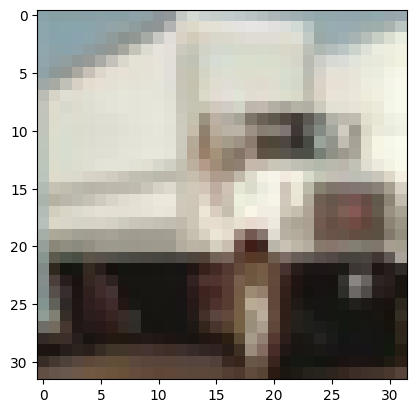

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [8]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

c:\Users\admin\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 19s 5ms/step - loss: 1.7205 - accuracy: 0.3746 - val_loss: 1.4496 - val_accuracy: 0.4813
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4498 - accuracy: 0.4774 - val_loss: 1.3383 - val_accuracy: 0.5189
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3511 - accuracy: 0.5166 - val_loss: 1.2591 - val_accuracy: 0.5555
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2791 - accuracy: 0.5449 - val_loss: 1.3182 - val_accuracy: 0.5236
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2348 - accuracy: 0.5617 - val_loss: 1.1215 - val_accuracy: 0.6057
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2007 - accuracy: 0.5756 - val_loss: 1.1060 - val_accuracy: 0.6071
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1697 - accuracy: 0.5893 - val_loss: 1.1454 - val_accuracy

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

### Build a more complicated model with the following pattern: Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
### Use strides of 1 for all convolutional layers.

In [10]:
model_supple = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_supple.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_supple.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_supple.add(Conv2D(32, (5, 5), strides = (1,1)))
model_supple.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_supple.add(MaxPooling2D(pool_size=(2, 2)))
model_supple.add(Dropout(0.25))

model_supple.add(Conv2D(32, (5, 5), strides = (1,1)))
model_supple.add(Activation('relu'))

model_supple.add(Conv2D(32, (5, 5), strides = (1,1)))
model_supple.add(Activation('relu'))

model_supple.add(MaxPooling2D(pool_size=(2, 2)))
model_supple.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_supple.add(Flatten())
model_supple.add(Dense(512))
model_supple.add(Activation('relu'))
model_supple.add(Dropout(0.5))
model_supple.add(Dense(num_classes))
model_supple.add(Activation('softmax'))

model_supple.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                      

### Write the number of parameters of your model  and compare it to the previous model

> The total parameters of supple model is 232426, while the procedure model is 181162. We can see that the supple model has more parameters compared to the procedure model due to its increased number of convolution.

### Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

In [12]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_supple.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_supple.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7086 - accuracy: 0.3694 - val_loss: 1.5564 - val_accuracy: 0.4598
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3111 - accuracy: 0.5329 - val_loss: 1.2114 - val_accuracy: 0.5695
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1645 - accuracy: 0.5902 - val_loss: 1.0628 - val_accuracy: 0.6220
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0786 - accuracy: 0.6235 - val_loss: 1.0164 - val_accuracy: 0.6416
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0250 - accuracy: 0.6433 - val_loss: 0.9641 - val_accuracy: 0.6632



> In training the models, supple model has a faster training time due to its smaller epoch compared to procedure model. Upon looking on their results, supple model has a lower loss and higher accuracy than the procedure model.

### Use different structures and run times, and see how accurate your model can be.

In [20]:
model_supple1 = Sequential()

# Convolutional Layer
model_supple1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_supple1.add(BatchNormalization())
model_supple1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_supple1.add(BatchNormalization())

# Pooling layer
model_supple1.add(MaxPool2D(pool_size=(2, 2)))

# Dropout layers
model_supple1.add(Dropout(0.25))

model_supple1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_supple1.add(BatchNormalization())
model_supple1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_supple1.add(BatchNormalization())

model_supple1.add(MaxPool2D(pool_size=(2, 2)))

model_supple1.add(Dropout(0.25))

model_supple1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_supple1.add(BatchNormalization())
model_supple1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_supple1.add(BatchNormalization())
model_supple1.add(MaxPool2D(pool_size=(2, 2)))

model_supple1.add(Dropout(0.25))

model_supple1.add(Flatten())

# model.add(Dropout(0.2))
model_supple1.add(Dense(128, activation='relu'))
model_supple1.add(Dropout(0.25))
model_supple1.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model_supple1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [21]:
model_supple1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [26]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_supple1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_supple1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test))

c:\Users\admin\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.6923 - accuracy: 0.3913 - val_loss: 1.4174 - val_accuracy: 0.4941
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2564 - accuracy: 0.5517 - val_loss: 1.1663 - val_accuracy: 0.5923
Epoch 3/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0913 - accuracy: 0.6130 - val_loss: 0.9618 - val_accuracy: 0.6606
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9898 - accuracy: 0.6525 - val_loss: 0.9632 - val_accuracy: 0.6534
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9178 - accuracy: 0.6785 - val_loss: 0.9267 - val_accuracy: 0.6850
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8649 - accuracy: 0.6966 - val_loss: 0.8726 - val_accuracy: 0.6950
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8203 - accuracy: 0.7154 - val_loss: 0.7342 - val

#### Conclusion

> This activity helped me understand the building and evaluation of convolutional neural networks. Understanding the whole convolutional neural networks is pretty confusing at first, due to its multiple layered architecture, and some of its paramters being new knowledge to me. As time goes by and endless hours of looking into my screen, I somehow understood the architecture of the CNN. Training the model is time consuming, so I used a different kernel, named CUDA, where it utilizes the computer's GPU for faster training. Hyptertuning the parameters is pretty challenging, but it is needed for higher accuracy and low loss. Overall, this activity helped me understand the whole concept of building and evaluating a model using convolutional neural networks.